In [ ]:
import json
import os
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt

#Extracting time info from real users and fake users

## Account creation time - Tweet creation time

In [ ]:
directory1 = "/content/drive/MyDrive/FakeNewDet-FYP/code/fakenewsnet_dataset/politifact/real"
directory2 = "/content/drive/MyDrive/FakeNewDet-FYP/code/fakenewsnet_dataset/politifact/fake"

In [ ]:
article =  []
tweet = []
time_sec = []
user = []

#Real users time of account creation - tweet creation in seconds
for folder in os.listdir(directory1):
  folderpath = directory1+"/" + str(folder)
  if (str(folder) == "politifact9734") or (str(folder) == "politifact999") or (str(folder) == "politifact8227") or (str(folder) == "politifact7293") or (str(folder) == "politifact667") or (str(folder) == "politifact5276") or (str(folder) == "politifact4809") or (str(folder) == "politifact4358") or (str(folder) == "politifact4088") or (str(folder) == "politifact333") or (str(folder) == "politifact1783") or (str(folder) == "politifact1823") or (str(folder) == "politifact1436") or (str(folder) == "politifact13260"):
    continue
  for file in os.listdir(folderpath + "/tweets/"):
    json_path = folderpath + "/tweets/" + str(file)
    f=open(json_path)
    data = json.load(f)
    tweet_cre = datetime.strptime(' '.join(data['created_at'][4:].split("+0000")), '%b %d %H:%M:%S %Y')
    acc_cre = datetime.strptime(' '.join(data['user']['created_at'][4:].split("+0000")), '%b %d %H:%M:%S %Y')
    tweet.append(data['id'])
    user.append(data['user']['id'])
    time_sec.append((tweet_cre-acc_cre)/timedelta(seconds=1))
    article.append(str(folder[10:]))

#Fake users time of account creation - tweet creation in seconds
for folder in os.listdir(directory2):
  folderpath = directory2+"/" + str(folder)
  if (str(folder) == "politifact15355") or (str(folder) == "politifact14862") or (str(folder) == "politifact14678") or (str(folder) == "politifact14388") or (str(folder) == "politifact14394") or (str(folder) == "politifact14305") or (str(folder) == "politifact13919"):
    continue
  for file in os.listdir(folderpath + "/tweets/"):
    json_path = folderpath + "/tweets/" + str(file)
    f=open(json_path)
    data = json.load(f)
    tweet_cre = datetime.strptime(' '.join(data['created_at'][4:].split("+0000")), '%b %d %H:%M:%S %Y')
    acc_cre = datetime.strptime(' '.join(data['user']['created_at'][4:].split("+0000")), '%b %d %H:%M:%S %Y')
    tweet.append(data['id'])
    user.append(data['user']['id'])
    time_sec.append((tweet_cre-acc_cre)/timedelta(seconds=1))
    article.append(str(folder[10:]))


In [ ]:
Time_Analysis = pd.DataFrame()
Time_Analysis['Article_id'] = article
Time_Analysis['Tweet_id'] = tweet
Time_Analysis['User_id'] = user
Time_Analysis['Time_sec'] = time_sec
Time_Analysis['Label'] = 'None'
Time_Analysis['Label'][0:1796] = 'Real'
Time_Analysis['Label'][1796:] = 'Fake'
Time_Analysis['Site'] = 'Politifact'
Time_Analysis['ID']= range(4597)
Time_Analysis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Article_id,Tweet_id,User_id,Time_sec,Label,Site,ID
0,9691,494475371278909441,770240462,61229781.0,Real,Politifact,0
1,9691,494480095512248320,1582545024,33283427.0,Real,Politifact,1
2,9691,494476039628673024,8235612,219418458.0,Real,Politifact,2
3,9691,494514485957525504,528829450,74633321.0,Real,Politifact,3
4,9691,494479344186585089,2493909948,6669510.0,Real,Politifact,4
...,...,...,...,...,...,...,...
4592,13687,755236203184676864,1170329850,108271265.0,Fake,Politifact,4592
4593,13687,755229426871173120,476453007,141170378.0,Fake,Politifact,4593
4594,13687,755286149082521600,3047952859,43831094.0,Fake,Politifact,4594
4595,13687,755240045053968384,347330096,156594734.0,Fake,Politifact,4595


In [ ]:
Time_Analysis.to_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/Time_Analysis.csv')

In [ ]:
Time_Analysis = pd.read_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/Time_Analysis.csv', index_col=[0])

In [ ]:
Time_a = Time_Analysis[:1796]

In [ ]:
Time_b = Time_Analysis[1796:]

##Visualization

Label
Fake    1.547725e+08
Real    1.097517e+08
Name: Time_sec, dtype: float64


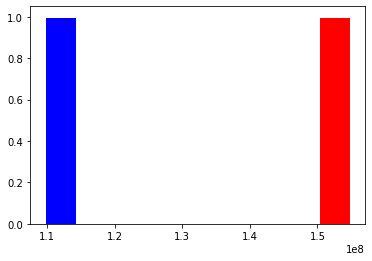

In [ ]:
tt = Time_Analysis.groupby(["Label"]).mean()["Time_sec"]
print(tt)
fig, ax = plt.subplots()
N, bins, patches= ax.hist(tt, edgecolor = 'white', linewidth = 1)
for i in range(0,1):
  patches[i].set_facecolor('b')
for i in range(9,10):
  patches[i].set_facecolor('r')

plt.show()

Text(0.5, 1.0, 'Number of Labelled Tweets')

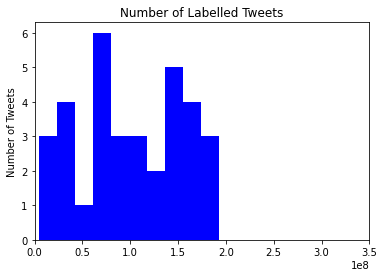

In [ ]:
tr = list(Time_a.groupby(["Article_id"]).mean()["Time_sec"])
plt.hist(tr, color = 'blue')
plt.xlim(0,3.5e+08)
plt.ylabel('Number of Tweets')
plt.title('Number of Labelled Tweets')

Text(0.5, 1.0, 'Number of Labelled Tweets')

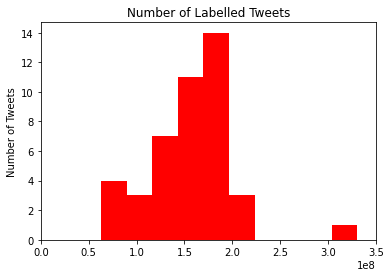

In [ ]:
tf = list(Time_b.groupby(["Article_id"]).mean()["Time_sec"])
plt.hist(tf, color = 'red')
plt.xlim(0,3.5e+08)
plt.ylabel('Number of Tweets')
plt.title('Number of Labelled Tweets')

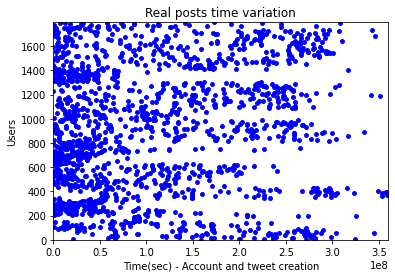

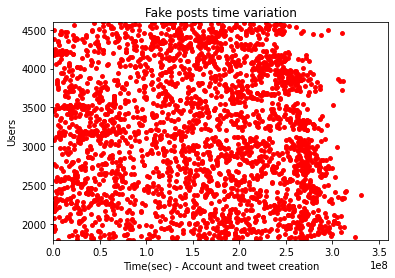

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=Time_Analysis['Time_sec'][:1796], y=Time_Analysis['ID'][:1796], s= 15, c="blue")
plt.ylim(0, 1796)
plt.xlim(0, 360000000)
plt.ylabel("Users")
plt.xlabel("Time(sec) - Account and tweet creation")
plt.title("Real posts time variation")
plt.show()

plt.scatter(x=Time_Analysis['Time_sec'][1796:], y=Time_Analysis['ID'][1796:], s=15, c="red")
plt.ylim(1796, 4596)
plt.xlim(0, 360000000)
plt.ylabel("Users")
plt.xlabel("Time(sec) - Account and tweet creation")
plt.title("Fake posts time variation")
plt.show()

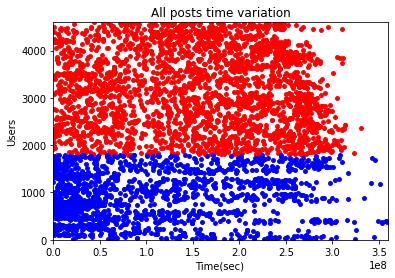

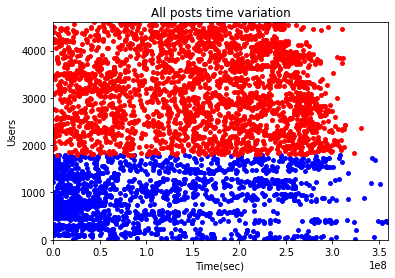

In [ ]:
plt.scatter(x=Time_Analysis['Time_sec'][1796:], y=Time_Analysis['ID'][1796:], s=15, c="red")
plt.scatter(x=Time_Analysis['Time_sec'][:1796], y=Time_Analysis['ID'][:1796], s= 15, c="blue")
plt.ylim(0, 4596)
plt.xlim(0, 360000000)
plt.ylabel("Users")
plt.xlabel("Time(sec) ")
plt.title("All posts time variation")
plt.show()

plt.scatter(x=Time_Analysis['Time_sec'][:1796], y=Time_Analysis['ID'][:1796], s= 15, c="blue")
plt.scatter(x=Time_Analysis['Time_sec'][1796:], y=Time_Analysis['ID'][1796:], s=15, c="red")
plt.ylim(0, 4596)
plt.xlim(0, 360000000)
plt.ylabel("Users")
plt.xlabel("Time(sec) ")
plt.title("All posts time variation")
plt.show()

In [ ]:
plt.scatter(x=Time_Analysis['Time_sec'][:1796], y=Time_Analysis['User_id'][:1796], s=15, c="blue")
plt.scatter(x=Time_Analysis['Time_sec'][1796:], y=Time_Analysis['User_id'][1796:], s=15, c="red")
plt.legend(["real", "fake"])
plt.ylim(0, 1111111111111111111)
plt.xlim(0, 5*e7)
plt.ylabel("Users")
plt.xlabel("Time(sec) ")
plt.title("All posts time variation")
plt.show()

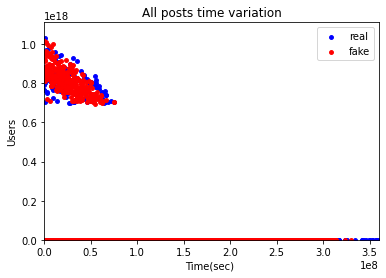

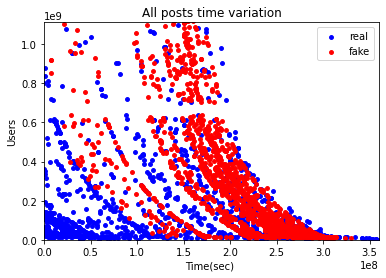

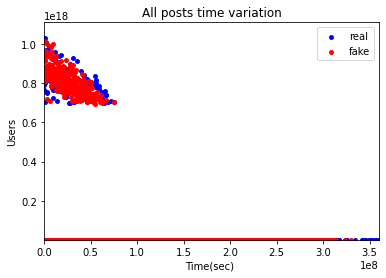

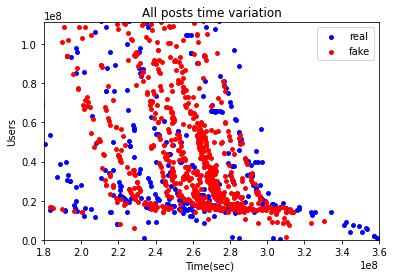

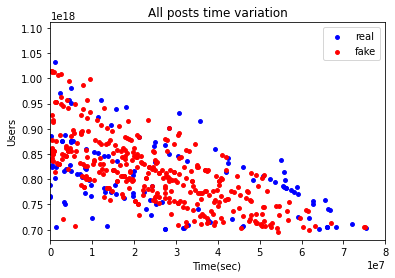

In [ ]:
plt.scatter(x=Time_Analysis['Time_sec'][:1796], y=Time_Analysis['User_id'][:1796], s=15, c="blue")
plt.scatter(x=Time_Analysis['Time_sec'][1796:], y=Time_Analysis['User_id'][1796:], s=15, c="red")
plt.legend(["real", "fake"])
plt.ylim(0, 1111111111111111111)
plt.xlim(0, 360000000)
plt.ylabel("Users")
plt.xlabel("Time(sec) ")
plt.title("All posts time variation")
plt.show()

plt.scatter(x=Time_Analysis['Time_sec'][:1796], y=Time_Analysis['User_id'][:1796], s=15, c="blue")
plt.scatter(x=Time_Analysis['Time_sec'][1796:], y=Time_Analysis['User_id'][1796:], s=15, c="red")
plt.legend(["real", "fake"])
plt.ylim(0, 1111111111)
plt.xlim(0, 360000000)
plt.ylabel("Users")
plt.xlabel("Time(sec) ")
plt.title("All posts time variation")
plt.show()

plt.scatter(x=Time_Analysis['Time_sec'][:1796], y=Time_Analysis['User_id'][:1796], s=15, c="blue")
plt.scatter(x=Time_Analysis['Time_sec'][1796:], y=Time_Analysis['User_id'][1796:], s=15, c="red")
plt.legend(["real", "fake"])
plt.ylim(1111111111,1111111111111111111)
plt.xlim(0, 360000000)
plt.ylabel("Users")
plt.xlabel("Time(sec) ")
plt.title("All posts time variation")
plt.show()

plt.scatter(x=Time_Analysis['Time_sec'][:1796], y=Time_Analysis['User_id'][:1796], s=15, c="blue")
plt.scatter(x=Time_Analysis['Time_sec'][1796:], y=Time_Analysis['User_id'][1796:], s=15, c="red")
plt.legend(["real", "fake"])
plt.xlim(180000000, 360000000)
plt.ylim(0,111111111)
plt.ylabel("Users")
plt.xlabel("Time(sec) ")
plt.title("All posts time variation")
plt.show()

import matplotlib.pyplot as plt
plt.scatter(x=Time_Analysis['Time_sec'][:1796], y=Time_Analysis['User_id'][:1796], s=15, c="blue")
plt.scatter(x=Time_Analysis['Time_sec'][1796:], y=Time_Analysis['User_id'][1796:], s=15, c="red")
plt.legend(["real", "fake"])
plt.xlim(0, 80000000)
plt.ylim(680000000000000000,1111111111111111111)
plt.ylabel("Users")
plt.xlabel("Time(sec) ")
plt.title("All posts time variation")
plt.show()

In [ ]:
print("Real Tweets ----- ")
print(f"Min time: {min(Time_Analysis['Time_sec'][:1796])}, Average time: {Time_Analysis['Time_sec'][:1796].mean()} and Max time: {max(Time_Analysis['Time_sec'][:1796])}")
print("Fake Tweets ----- ")
print(f"Min time: {min(Time_Analysis['Time_sec'][1796:])}, Average time: {Time_Analysis['Time_sec'][1796:].mean()} and Max time: {max(Time_Analysis['Time_sec'][1796:])}")

Real Tweets ----- 
Min time: 10.0, Average time: 109751654.02728285 and Max time: 358999522.0
Fake Tweets ----- 
Min time: 55576.0, Average time: 154772517.35772938 and Max time: 330559389.0


# News Article related temporal features


In [ ]:
# Real articles

userid = []
tweetid = []
art_tweet_time = []
articleid = []
art_acc_time = []
acc_tweet_time = []
tweet_creation = []
account_creation = []
article_published = []
count = 0
for folder in os.listdir(directory1):
  folderpath=directory1+"/"+str(folder)
  flag = 0
  for subfolder in os.listdir(folderpath):
    twt=folderpath+"/"+str(subfolder)
    if subfolder == "news content.json":
      news = open(folderpath+"/"+str(subfolder))
      newsdata = json.load(news)
      if 'article' in newsdata['meta_data'].keys():
        if 'published' in newsdata['meta_data']['article'].keys():
          count+=1
          news_cre = datetime.strptime(' '.join(newsdata['meta_data']['article']['published'][:19].split("T")), '%Y-%m-%d %H:%M:%S')
          flag = 1 
        elif 'published_time' in newsdata['meta_data']['article'].keys():
          count+=1
          news_cre = datetime.strptime(' '.join(newsdata['meta_data']['article']['published_time'][:19].split("T")), '%Y-%m-%d %H:%M:%S')
          flag = 1
    if subfolder == "tweets" and flag == 1:
      for file in os.listdir(folderpath + "/tweets/"):
        ft=open(folderpath + "/tweets/" + str(file))
        tweetdata = json.load(ft)
        tweet_cre1 = datetime.strptime(' '.join(tweetdata['created_at'][4:].split("+0000")), '%b %d %H:%M:%S %Y')
        acc_cre1 = datetime.strptime(' '.join(tweetdata['user']['created_at'][4:].split("+0000")), '%b %d %H:%M:%S %Y')
        tweet_creation.append(tweet_cre1)
        account_creation.append(acc_cre1)
        article_published.append(news_cre)
        articleid.append(str(folder[10:]))
        tweetid.append(tweetdata['id'])
        userid.append(tweetdata['user']['id'])
        acc_tweet_time.append((tweet_cre1-acc_cre1)/timedelta(seconds=1))
        art_tweet_time.append((tweet_cre1-news_cre)/timedelta(seconds=1))
        art_acc_time.append((acc_cre1-news_cre)/timedelta(seconds=1))

In [ ]:
# Fake articles

useridf = []
tweetidf = []
art_tweet_timef = []
articleidf = []
art_acc_timef = []
acc_tweet_timef = []
tweet_creationf = []
account_creationf = []
article_publishedf = []
count = 0
for folder in os.listdir(directory2):
  folderpath=directory2+"/"+str(folder)
  flag = 0
  for subfolder in os.listdir(folderpath):
    twt=folderpath+"/"+str(subfolder)
    if subfolder == "news content.json":
      newsf = open(folderpath+"/"+str(subfolder))
      newsdataf = json.load(newsf)
      if 'article' in newsdataf['meta_data'].keys():
        if 'published' in newsdataf['meta_data']['article'].keys():
          count+=1
          news_cref = datetime.strptime(' '.join(newsdataf['meta_data']['article']['published'][:19].split("T")), '%Y-%m-%d %H:%M:%S')
          flag = 1 
        elif 'published_time' in newsdataf['meta_data']['article'].keys():
          count+=1
          news_cref = datetime.strptime(' '.join(newsdataf['meta_data']['article']['published_time'][:19].split("T")), '%Y-%m-%d %H:%M:%S')
          flag = 1
    if subfolder == "tweets" and flag == 1:
      for file in os.listdir(folderpath + "/tweets/"):
        ft=open(folderpath + "/tweets/" + str(file))
        tweetdataf = json.load(ft)
        tweet_cre1f = datetime.strptime(' '.join(tweetdataf['created_at'][4:].split("+0000")), '%b %d %H:%M:%S %Y')
        acc_cre1f = datetime.strptime(' '.join(tweetdataf['user']['created_at'][4:].split("+0000")), '%b %d %H:%M:%S %Y')
        tweet_creationf.append(tweet_cre1f)
        account_creationf.append(acc_cre1f)
        article_publishedf.append(news_cref)
        articleidf.append(str(folder[10:]))
        tweetidf.append(tweetdataf['id'])
        useridf.append(tweetdataf['user']['id'])
        acc_tweet_timef.append((tweet_cre1f-acc_cre1f)/timedelta(seconds=1))
        art_tweet_timef.append((tweet_cre1f-news_cref)/timedelta(seconds=1))
        art_acc_timef.append((acc_cre1f-news_cref)/timedelta(seconds=1))

In [ ]:
Time_r = pd.DataFrame()
Time_r['Article_id'] = articleid
Time_r['Tweet_id'] = tweetid
Time_r['User_id'] = userid
Time_r['tweet_creation_time'] = tweet_creation
Time_r['account_creation_time'] = account_creation
Time_r['article_published_time'] = article_published
Time_r['acc_tweet_time'] = acc_tweet_time
Time_r['art_tweet_time'] = art_tweet_time
Time_r['art_acc_time'] = art_acc_time
print(Time_r.groupby(['Article_id']).agg(['mean', 'count']))
print(Time_r)

                       Tweet_id        ...  art_acc_time      
                           mean count  ...          mean count
Article_id                             ...                    
12945        768885297303641088    56  ... -1.440757e+08    56
513         1019355014120440576    87  ...  1.266650e+08    87

[2 rows x 10 columns]
    Article_id             Tweet_id  ...  art_tweet_time art_acc_time
0          513  1019342286893801480  ...     319369034.0  208059601.0
1          513  1019334214460821504  ...     319367109.0  169870661.0
2          513  1019330010279239680  ...     319366107.0   86514102.0
3          513  1019330809688461319  ...     319366297.0   92445839.0
4          513  1019329269166673920  ...     319365930.0  169870661.0
..         ...                  ...  ...             ...          ...
138      12945   765217584778207234  ...        -14572.0  -47282707.0
139      12945   765224116471214081  ...        -13014.0 -187824757.0
140      12945   765775985547603

In [ ]:
Time_f = pd.DataFrame()
Time_f['Article_id'] = articleidf
Time_f['Tweet_id'] = tweetidf
Time_f['User_id'] = useridf
Time_f['tweet_creation_time'] = tweet_creationf
Time_f['account_creation_time'] = account_creationf
Time_f['article_published_time'] = article_publishedf
Time_f['acc_tweet_time'] = acc_tweet_timef
Time_f['art_tweet_time'] = art_tweet_timef
Time_f['art_acc_time'] = art_acc_timef
print(Time_f.groupby(['Article_id']).agg(['mean', 'count']))
print(Time_f)

                       Tweet_id             User_id  ... art_tweet_time  art_acc_time      
                           mean count          mean  ...          count          mean count
Article_id                                           ...                                   
13773        494032426558949376    96  4.661101e+08  ...             96 -1.184237e+08    96
13775        732884239176379008    89  1.605142e+16  ...             89 -1.540137e+08    89
13806        808696616822175872    89  1.695602e+16  ...             89 -6.346089e+07    89
13836        845683194722708736    64  3.801895e+17  ...             64 -9.088541e+07    64
14233        876988526625206272     1  2.697313e+08  ...              1 -1.910643e+08     1
14235        872853185026865280    78  1.015738e+17  ...             78 -1.794784e+08    78
14310        684923579131218944    94  1.198560e+09  ...             94 -1.199985e+08    94
14328        880915635491783296    85  3.305868e+17  ...             85 -1.03907

In [ ]:
print(Time_r['art_tweet_time'].mean())
print(Time_r['art_acc_time'].mean())
print(Time_r['acc_tweet_time'].mean())
print(Time_f['art_tweet_time'].mean())
print(Time_f['art_acc_time'].mean())
print(Time_f['acc_tweet_time'].mean())

194640022.1958042
20640647.692307692
173999374.5034965
9019421.309859155
-143177680.69262636
152197102.0024855


In [ ]:
Time_r.to_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/Time_Analysis_Real.csv')
Time_f.to_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/Time_Analysis_Fake.csv')

In [ ]:
Time_r = pd.read_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/Time_Analysis_Real.csv')
Time_f = pd.read_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/Time_Analysis_Fake.csv')
Time_r['Label'] = 'Real'
Time_f['Label'] = 'Fake'
Time_rf = pd.concat([Time_r,Time_f])

##Visualization

Text(0.5, 1.0, 'Fake and real posts Article and tweet time variation')

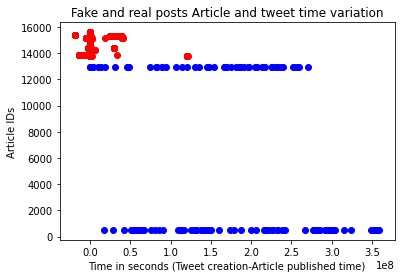

In [ ]:
plt.scatter(Time_r['acc_tweet_time'], Time_r['Article_id'] , c = "blue" )
plt.scatter(Time_f['art_tweet_time'], Time_f['Article_id'] , c = "red" )
plt.ylabel("Article IDs")
plt.xlabel("Time in seconds (Tweet creation-Article published time)")
plt.title("Fake and real posts Article and tweet time variation")

Text(0.5, 1.0, 'Number of Labelled Tweets')

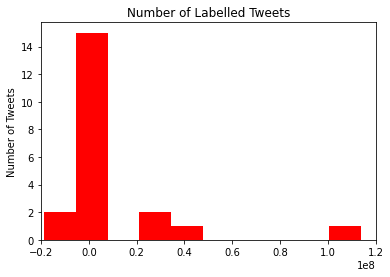

In [ ]:
tf = list(Time_f.groupby(["Article_id"]).mean()["art_tweet_time"])
tr = list(Time_r.groupby(["Article_id"]).mean()['art_tweet_time'])
plt.hist(tf, color = 'red')
plt.xlim(-0.2e+08,1.2e+08)
plt.ylabel('Number of Tweets')
plt.title('Number of Labelled Tweets')

(-20000000.0, 120000000.0)

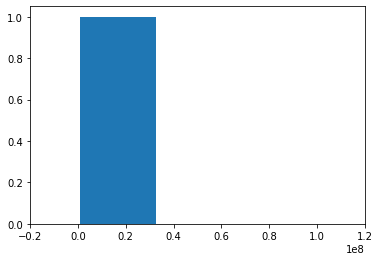

In [ ]:
plt.hist(tr)
plt.xlim(-0.2e+08,1.2e+08)

Text(0.5, 1.0, 'Number of Labelled Tweets')

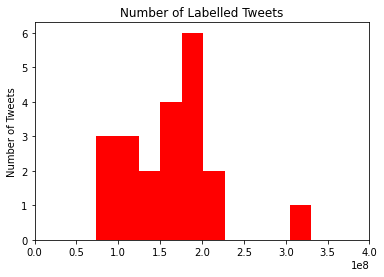

In [ ]:
tf = list(Time_f.groupby(["Article_id"]).mean()["acc_tweet_time"])
tr = list(Time_r.groupby(["Article_id"]).mean()['acc_tweet_time'])
plt.hist(tf, color = 'red')
plt.xlim(0,4e+08)
plt.ylabel('Number of Tweets')
plt.title('Number of Labelled Tweets')

(0.0, 400000000.0)

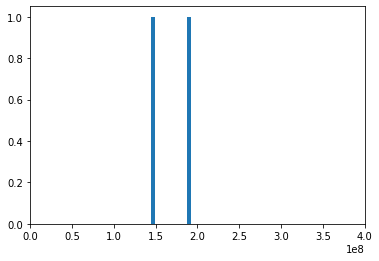

In [ ]:
plt.hist(tr)
plt.xlim(0,4e+08)

Text(0.5, 1.0, 'Number of Labelled Tweets')

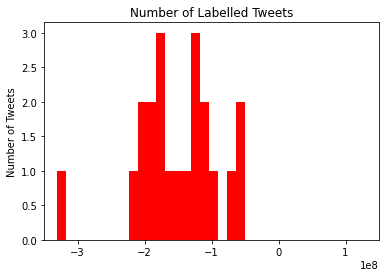

In [ ]:
tf = list(Time_f.groupby(["Article_id"]).mean()["art_acc_time"])
tr = list(Time_r.groupby(["Article_id"]).mean()['art_acc_time'])
plt.hist(tf, color = 'red', bins = 21)
plt.xlim(-3.5e+08,1.5e+08)
plt.ylabel('Number of Tweets')
plt.title('Number of Labelled Tweets')

(-350000000.0, 150000000.0)

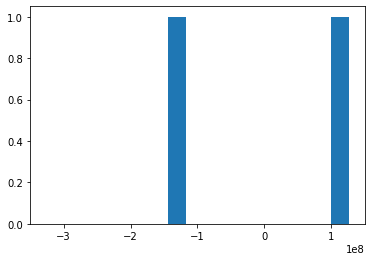

In [ ]:
plt.hist(tr)
plt.xlim(-3.5e+08,1.5e+08)

Text(0.5, 1.0, 'Fake and real posts Article and tweet time variation')

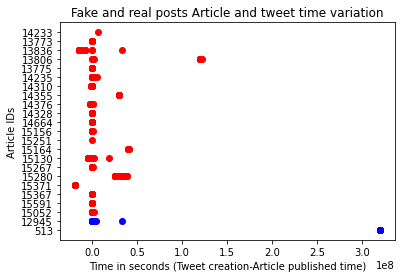

In [ ]:
#print("Min and Max article_tweet time (real) in seconds", min(art_tweet_time), max(art_tweet_time))
#print("Min and Max article_tweet time (fake) in seconds", min(art_tweet_timef), max(art_tweet_timef))

plt.scatter(Time_r['art_tweet_time'], Time_r['Article_id'] , c = "blue" )
plt.scatter(Time_f['art_tweet_time'], Time_f['Article_id'] , c = "red" )
plt.ylabel("Article IDs")
#plt.xlim(-0.5e8,0.5e8)
plt.xlabel("Time in seconds (Tweet creation-Article published time)")
plt.title("Fake and real posts Article and tweet time variation")

Text(0.5, 1.0, 'Fake and real posts Article and account time variation')

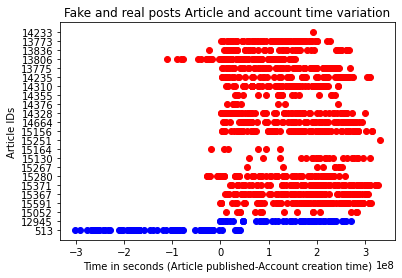

In [ ]:
#print("Min and Max Article_Account time (Real) in seconds", min(art_acc_time), max(art_acc_time))
#print("Min and Max Article_Account time (Fake) in seconds", min(art_acc_timef), max(art_acc_timef))

plt.scatter(-Time_r['art_acc_time'], Time_r['Article_id'] , c = "blue" )
plt.scatter(-Time_f['art_acc_time'], Time_f['Article_id'] , c = "red" )
plt.ylabel("Article IDs")
#plt.ylim(0,30000)
plt.xlabel("Time in seconds (Article published-Account creation time)")
plt.title("Fake and real posts Article and account time variation")

Text(0.5, 1.0, 'Fake and real posts Article and account time variation')

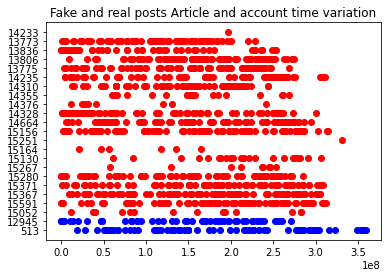

In [ ]:
#print("Min and Max acc_tweet time (real) in seconds", min(acc_tweet_time), max(acc_tweet_time))
#print("Min and Max acc_tweet time (fake) in seconds", min(acc_tweet_timef), max(acc_tweet_timef))
#plt.ylim(0,30000)
plt.scatter(Time_r['acc_tweet_time'], Time_r['Article_id'] , c = "blue" )
plt.scatter(Time_f['acc_tweet_time'], Time_f['Article_id'] , c = "red" )
plt.title("Fake and real posts Article and account time variation")

#User timeline Tweets

##For 1 user

In [ ]:
path1 = '/content/drive/MyDrive/FakeNewDet-FYP/code/fakenewsnet_dataset/user_timeline_tweets/1033011336278466563.json'
Timeline_tweet1 = []
Timeline_time1 = []
Timeline_tweet_cre1 = []
df1 = json.load(open(path1))
for i in range(len(df1)):
  if i!=0:
    Timeline_tweet_time1 = datetime.strptime(' '.join(df1[i]['created_at'][4:].split("+0000")), '%b %d %H:%M:%S %Y')
  else:
    Timeline_acc_time1 = datetime.strptime(' '.join(df1[i]['user']['created_at'][4:].split("+0000")), '%b %d %H:%M:%S %Y')
    Timeline_tweet_time1 = datetime.strptime(' '.join(df1[i]['created_at'][4:].split("+0000")), '%b %d %H:%M:%S %Y')
  Timeline_time1.append((Timeline_tweet_time1-Timeline_acc_time1)/timedelta(seconds=1))
  Timeline_tweet_cre1.append(Timeline_tweet_time1)
  Timeline_tweet1.append(df1[i]['id'])
Timeline_tweets1 = pd.DataFrame()
Timeline_tweets1['Tweet_id'] = Timeline_tweet1
Timeline_tweets1['Time_acc_tweet'] = Timeline_time1
Timeline_tweets1['Time_tweet_cre'] = Timeline_tweet_cre1

In [ ]:
Timeline_tweet_cre1.sort()
sum = 0
for i in range(len(Timeline_tweet_cre1)-1,0,-1):
  sum += (Timeline_tweet_cre1[i] - Timeline_tweet_cre1[i-1])/timedelta(seconds=1)
print(sum/4 , sum/2 , 3*sum/4)

114245.5 228491.0 342736.5


Text(0.5, 1.0, 'Single User Timeline Tweets')

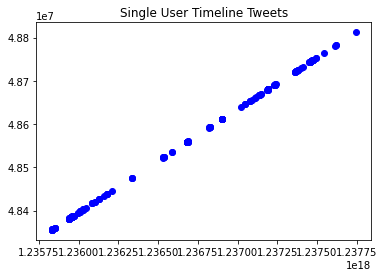

In [ ]:
plt.scatter(Timeline_tweets1['Tweet_id'], Timeline_tweets1['Time_acc_tweet'] , c = "blue" )
plt.title("Single User Timeline Tweets")

In [ ]:
path2 = '/content/drive/MyDrive/FakeNewDet-FYP/code/fakenewsnet_dataset/user_timeline_tweets/1014713682608222209.json'
Timeline_tweet2 = []
Timeline_time2 = []
df2 = json.load(open(path2))
for i in range(len(df2)):
  if i!=0:
    Timeline_tweet_time2 = datetime.strptime(' '.join(df2[i]['created_at'][4:].split("+0000")), '%b %d %H:%M:%S %Y')
  else:
    Timeline_acc_time2 = datetime.strptime(' '.join(df2[i]['user']['created_at'][4:].split("+0000")), '%b %d %H:%M:%S %Y')
    Timeline_tweet_time2 = datetime.strptime(' '.join(df2[i]['created_at'][4:].split("+0000")), '%b %d %H:%M:%S %Y')
  Timeline_time2.append((Timeline_tweet_time2-Timeline_acc_time2)/timedelta(seconds=1))
  Timeline_tweet2.append(df2[i]['id'])
Timeline_tweets2 = pd.DataFrame()
Timeline_tweets2['Tweet_id'] = Timeline_tweet2
Timeline_tweets2['Time_acc_tweet'] = Timeline_time2

Text(0.5, 1.0, 'Single User Timeline Tweets')

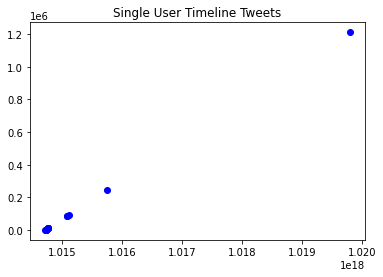

In [ ]:
plt.scatter(Timeline_tweets2['Tweet_id'], Timeline_tweets2['Time_acc_tweet'] , c = "blue" )
plt.title("Single User Timeline Tweets")

##For all users

In [ ]:
path = '/content/drive/MyDrive/FakeNewDet-FYP/code/fakenewsnet_dataset/user_timeline_tweets'
Timeline_user = []
Timeline_tweet = []
Timeline_time = []
for user in os.listdir(path):
  df = json.load(open(path+"/"+str(user)))
  for i in range(len(df)):
    if i!=0:
      Timeline_tweet_time = datetime.strptime(' '.join(df[i]['created_at'][4:].split("+0000")), '%b %d %H:%M:%S %Y')
    else:
      Timeline_acc_time = datetime.strptime(' '.join(df[i]['user']['created_at'][4:].split("+0000")), '%b %d %H:%M:%S %Y')
      Timeline_tweet_time = datetime.strptime(' '.join(df[i]['created_at'][4:].split("+0000")), '%b %d %H:%M:%S %Y')
    Timeline_time.append((Timeline_tweet_time-Timeline_acc_time)/timedelta(seconds=1))
    Timeline_tweet.append(df[i]['id'])
    Timeline_user.append(df[0]['user']['id'])
Timeline_tweets = pd.DataFrame()
Timeline_tweets['User_id'] = Timeline_user
Timeline_tweets['Tweet_id'] = Timeline_tweet
Timeline_tweets['Time_acc_tweet'] = Timeline_time

In [ ]:
Timeline_tweets.to_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/Timeline_tweets_time.csv')

In [ ]:
print(Timeline_tweets.groupby(['User_id']).agg(['mean']))

                         Tweet_id Time_acc_tweet
                             mean           mean
User_id                                         
13413                1.236651e+18   4.195975e+08
614853               1.233327e+18   4.145958e+08
697523               1.232667e+18   4.130407e+08
755019               1.229303e+18   4.112064e+08
801607               1.234601e+18   4.104955e+08
...                           ...            ...
1011743573769965570  1.022485e+18   2.561032e+06
1013474576251092993  1.083491e+18   1.669323e+07
1013941418417688582  1.215222e+18   4.798909e+07
1014713682608222209  1.015155e+18   1.052571e+05
1033011336278466563  1.236699e+18   4.856299e+07

[3914 rows x 2 columns]


Text(0.5, 1.0, 'Number of Labelled Tweets')

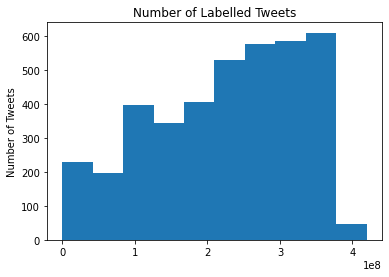

In [ ]:
tt = Timeline_tweets.groupby(["User_id"]).mean()["Time_acc_tweet"]
plt.hist(tt)
plt.ylabel('Number of Tweets')
plt.title('Number of Labelled Tweets')

Text(0.5, 1.0, 'User Timeline Tweets')

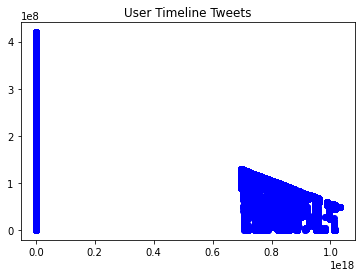

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=Timeline_tweets['user_id'],y= Timeline_tweets['Time_acc_tweet'] , c = "blue" )
plt.title("User Timeline Tweets")

In [ ]:
user_labelled = list(set(user))

In [ ]:
user_timeline = list(set(Timeline_user))

In [ ]:
val = np.in1d(user_timeline, user_labelled, invert = False)
com_users = list(np.array(user_timeline)[np.array(val)])
print(len(com_users))
print(com_users)

3914
[831511472656285696, 841080603583905792, 818270767406317569, 798351157001388033, 802803727233122305, 950935998904655877, 806575117992132614, 702789133635289092, 773673083756478470, 738451742061436928, 830853975792558081, 741077638459105282, 798603038118346756, 823666081436942341, 986982320606470149, 180690953, 16334857, 871360492995870722, 913151494559604746, 4068483082, 429555728, 108232726, 220323863, 100442137, 197640217, 2300551194, 4214136858, 18227229, 65445913, 14778397, 2497093667, 836943908, 108789800, 788226090, 78962736, 170950708, 219463734, 20537400, 14327866, 2869919802, 216997948, 248029247, 4323278913, 600088645, 176783432, 196599882, 309198925, 40992849, 144965713, 2710634580, 142032980, 230006882, 1450672226, 217137252, 787283152800780289, 49021031, 52256871, 508092522, 3428294764, 406601837, 14565490, 17539187, 28270707, 582557814, 2243633272, 25632889, 1249099898, 1978998907, 16285818, 27058303, 165298304, 787521589936001024, 778579793545662464, 788875597493702

In [ ]:
Timeline_tweets
labelled_fol = pd.read_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/userIdsFollowersFriendsStatuses.csv')

In [ ]:
merged_timeline = pd.merge(left=Timeline_tweets,right=labelled_fol, how='left', left_on='User_id', right_on='user_id')
merged_timeline.drop(['user_id'],axis=1,inplace = True)
merged_timeline.drop(['Unnamed: 0'], axis=1, inplace =True)

In [ ]:
merged_timeline.to_csv("/content/drive/MyDrive/BTECH_PRO_COE1,29,48/Combined_timeline_labelled_time.csv")

In [ ]:
Merged = pd.read_csv("/content/drive/MyDrive/BTECH_PRO_COE1,29,48/Combined_timeline_labelled_time.csv", index_col = [0])
Merged.drop(['Unnamed: 0.1'], axis=1, inplace =True)
print(Merged)

          User_id  ...  interacted_with_real
0       255637301  ...                   1.0
1       255637301  ...                   1.0
2       255637301  ...                   1.0
3       255637301  ...                   1.0
4       255637301  ...                   1.0
...           ...  ...                   ...
767690  930793291  ...                   NaN
767691  930793291  ...                   NaN
767692  930793291  ...                   NaN
767693  930793291  ...                   NaN
767694  930793291  ...                   NaN

[767695 rows x 8 columns]


In [ ]:
Merged.to_csv("/content/drive/MyDrive/BTECH_PRO_COE1,29,48/Combined_timeline_labelled_time.csv")

In [ ]:
print(Merged.columns)

Index(['Unnamed: 0', 'User_id', 'Tweet_id', 'Time_acc_tweet',
       'followers_count', 'friends_count', 'statuses_count',
       'interacted_with_fake', 'interacted_with_real'],
      dtype='object')


In [ ]:
print(Merged)

        Unnamed: 0    User_id  ...  interacted_with_fake  interacted_with_real
0                0  255637301  ...                   0.0                   1.0
1                1  255637301  ...                   0.0                   1.0
2                2  255637301  ...                   0.0                   1.0
3                3  255637301  ...                   0.0                   1.0
4                4  255637301  ...                   0.0                   1.0
...            ...        ...  ...                   ...                   ...
767690      767690  930793291  ...                   NaN                   NaN
767691      767691  930793291  ...                   NaN                   NaN
767692      767692  930793291  ...                   NaN                   NaN
767693      767693  930793291  ...                   NaN                   NaN
767694      767694  930793291  ...                   NaN                   NaN

[767695 rows x 9 columns]


In [ ]:
print(Merged.groupby(['User_id']).agg(['mean', 'count']))

                         Tweet_id        ... interacted_with_real      
                             mean count  ...                 mean count
User_id                                  ...                           
13413                1.236651e+18   200  ...                  1.0   200
614853               1.233327e+18   197  ...                  1.0   197
697523               1.232667e+18   200  ...                  1.0   200
755019               1.229303e+18   200  ...                  1.0   200
801607               1.234601e+18   200  ...                  1.0   200
...                           ...   ...  ...                  ...   ...
1011743573769965570  1.022485e+18   189  ...                  0.0   189
1013474576251092993  1.083491e+18   195  ...                  0.0   195
1013941418417688582  1.215222e+18   195  ...                  0.0   195
1014713682608222209  1.015155e+18    17  ...                  NaN     0
1033011336278466563  1.236699e+18   199  ...                  1.

Text(0, 0.5, 'Number of Tweets')

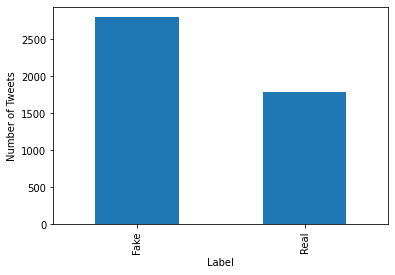

In [ ]:
Time_Analysis.groupby(['Label']).size().plot(kind='bar')
plt.ylabel('Number of Tweets')

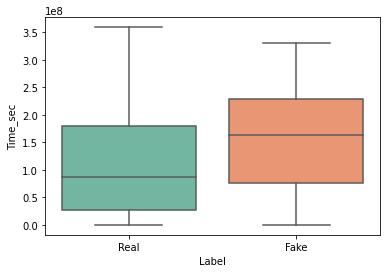

In [ ]:
import seaborn as sns
ax = sns.boxplot(x=Time_Analysis["Label"], y=Time_Analysis["Time_sec"], data=Time_Analysis, palette="Set2")

In [ ]:
print(Time_rf.columns)

Index(['Unnamed: 0', 'Article_id', 'Tweet_id', 'User_id',
       'tweet_creation_time', 'account_creation_time',
       'article_published_time', 'acc_tweet_time', 'art_tweet_time',
       'art_acc_time', 'Label'],
      dtype='object')


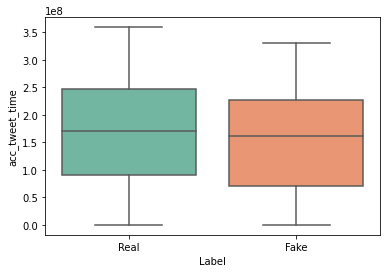

In [ ]:
import seaborn as sns
ax = sns.boxplot(x=Time_rf["Label"], y=Time_rf["acc_tweet_time"], data=Time_rf, palette="Set2")

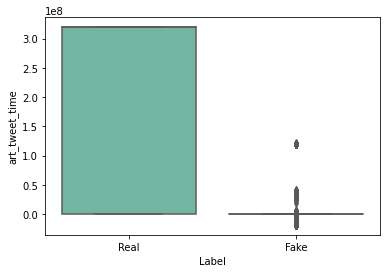

In [ ]:
import seaborn as sns
ax = sns.boxplot(x=Time_rf["Label"], y=Time_rf["art_tweet_time"], data=Time_rf, palette="Set2")

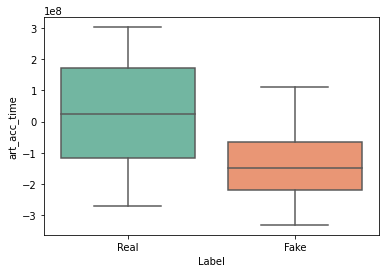

In [ ]:
import seaborn as sns
ax = sns.boxplot(x=Time_rf["Label"], y=Time_rf["art_acc_time"], data=Time_rf, palette="Set2")

In [ ]:
print(Merged.columns)

Index(['User_id', 'Tweet_id', 'Time_acc_tweet', 'followers_count',
       'friends_count', 'statuses_count', 'interacted_with_fake',
       'interacted_with_real'],
      dtype='object')


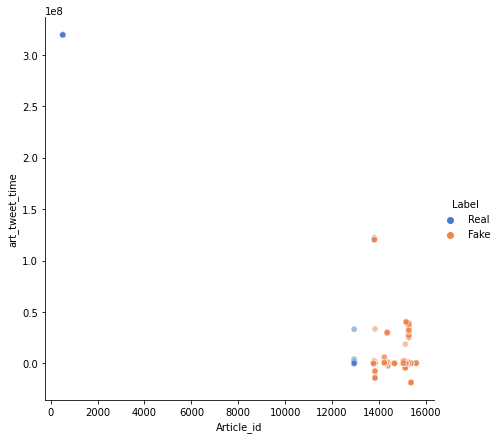

In [ ]:
sns.relplot(x=Time_rf["Article_id"], y=Time_rf["art_tweet_time"], hue=Time_rf['Label'],
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=Time_rf)

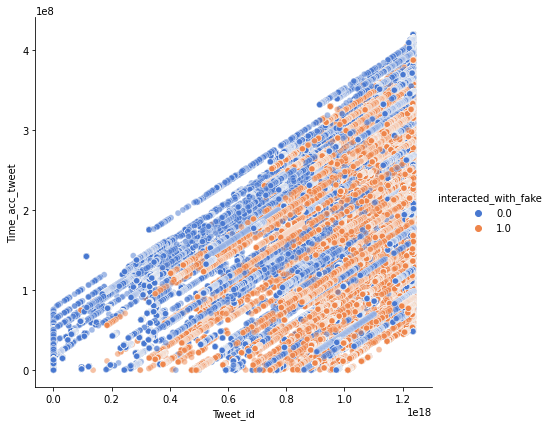

In [ ]:
sns.relplot(x=Merged["Tweet_id"], y=Merged["Time_acc_tweet"], hue=Merged['interacted_with_fake'],
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=Merged)

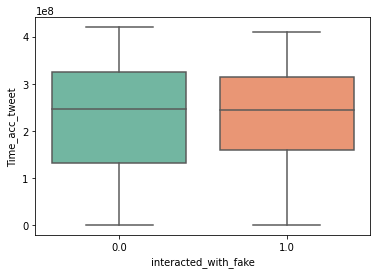

In [ ]:
import seaborn as sns
ax = sns.boxplot(x=Merged["interacted_with_fake"], y=Merged["Time_acc_tweet"], data=Merged, palette="Set2")

                      User_id  Tweet_id  ...  statuses_count  interacted_with_fake
interacted_with_real                     ...                                      
0.0                    392462    392462  ...          392462                392462
1.0                    247027    247027  ...          247027                247027

[2 rows x 7 columns]
interacted_with_real
0.0    2.306678e+08
1.0    2.262191e+08
Name: Time_acc_tweet, dtype: float64


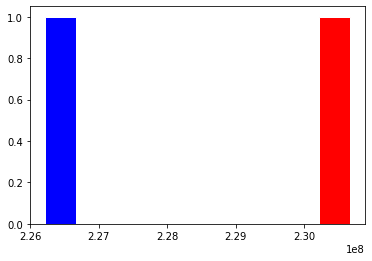

In [ ]:
figure = Merged.groupby(["interacted_with_real"]).mean()["Time_acc_tweet"]
print(Merged.groupby(["interacted_with_real"]).count())
print(figure)
fig, ax = plt.subplots()
N, bins, patches= ax.hist(tt, edgecolor = 'white', linewidth = 1)
for i in range(0,1):
  patches[i].set_facecolor('b')
for i in range(9,10):
  patches[i].set_facecolor('r')

plt.show()

# Temporal Features Selection 

## Preprocessing

In [ ]:
df_r = pd.read_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/Time_Analysis_Real.csv')
df_f = pd.read_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/Time_Analysis_Fake.csv')

In [ ]:
df_r['Label'] = 0
df_f['Label'] = 1

In [ ]:
dff = pd.concat([df_r,df_f])

In [ ]:
dff = dff.drop(columns = 'Unnamed: 0')

In [ ]:
print(dff.columns)

Index(['User_id', 'acc_tweet_time', 'art_tweet_time', 'art_acc_time', 'Label'], dtype='object')


In [ ]:
dff = dff.drop(columns = ['Article_id','Tweet_id','tweet_creation_time','account_creation_time', 'article_published_time'])

In [ ]:
fol = pd.read_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/userIdsFollowersFriendsStatuses.csv')

In [ ]:
fol = fol.drop(columns = 'Unnamed: 0')

In [ ]:
fol = fol.rename(columns = {'user_id':'User_id'}, inplace = False)

In [ ]:
print(fol.columns)

Index(['User_id', 'followers_count', 'friends_count', 'statuses_count',
       'interacted_with_fake', 'interacted_with_real'],
      dtype='object')


In [ ]:
time_fol = dff.merge(fol, how='left',on='User_id')

In [ ]:
time_fol = time_fol.drop(columns = ['interacted_with_real', 'interacted_with_fake', 'tweet_creation_time', 'account_creation_time', 'article_published_time'])

In [ ]:
time_fol.to_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/time_fol_main.csv')

In [ ]:
time_fol = pd.read_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/time_fol_main.csv', index_col = [0])

In [ ]:
Time_Analysis = pd.read_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/Time_Analysis.csv', index_col = [0])

In [ ]:
Textdata = pd.read_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/textdata.csv', index_col = [0])

In [ ]:
Textdata = Textdata.rename(columns={"id": "Tweet_id"})

In [ ]:
print(Textdata)

                      id     senti  ...  Adjective count  label_y
0     494475371278909441 -0.500000  ...                2        0
1     494480095512248320 -0.533333  ...                4        0
2     494476039628673024 -0.533333  ...                3        0
3     494514485957525504 -0.500000  ...                2        0
4     494479344186585089 -0.500000  ...                1        0
...                  ...       ...  ...              ...      ...
4588  755236203184676864  0.000000  ...                1        1
4589  755229426871173120  0.000000  ...                1        1
4590  755286149082521600  0.000000  ...                1        1
4591  755240045053968384  0.000000  ...                1        1
4592  755061854343340032  0.000000  ...                1        1

[4593 rows x 10 columns]


In [ ]:
time_text = Time_Analysis.merge(Textdata, how='left',on='Tweet_id')

In [ ]:
time_text = time_text.drop(columns = ['Article_id','Label','Site','ID'])

# Features

In [ ]:
time_text = pd.read_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/time_text.csv', index_col = [0])

In [ ]:
time_text

,Tweet_id,User_id,Time_sec,senti,PERSON,NORP,GPE,ORG,Verb count,Noun count,Adjective count,label_y
0,767896876,13413,40791306.0,0.000000,2.0,0.0,2.0,0.0,3.0,5.0,1.0,0.0
1,780586514698866688,614853,306654089.0,-0.022222,1.0,0.0,1.0,0.0,3.0,6.0,4.0,0.0
2,1039118159,697523,58747767.0,0.000000,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0
3,698653401199017984,755019,284689656.0,0.000000,0.0,0.0,1.0,1.0,0.0,3.0,2.0,0.0
4,784541765353209857,801607,303193127.0,0.500000,0.0,0.0,1.0,0.0,5.0,8.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4592,1015312780981952513,1011743573769965570,850965.0,0.000000,0.0,0.0,0.0,1.0,2.0,3.0,0.0,1.0
4593,1015314005399932932,1013474576251092993,438554.0,-0.183333,0.0,0.0,2.0,0.0,4.0,7.0,1.0,1.0
4594,1015231479553675264,1013941418417688582,307574.0,0.000000,0.0,0.0,0.0,1.0,2.0,3.0,0.0,1.0
4595,1015102514956525568,1014713682608222209,92704.0,0.000000,0.0,0.0,0.0,1.0,2.0,3.0,0.0,1.0


## Account creation time - Tweet creation time

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(time_text[['Time_sec']], time_text['label_y'], test_size=0.20, random_state=42)

SVC

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model1 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
model1.score(X_test, y_test)

0.683695652173913

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(max_depth=4, random_state=30)
model2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [ ]:
model2.score(X_test, y_test)

0.6880434782608695

Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model3 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=30).fit(X_train, y_train)

In [ ]:
model3.score(X_test, y_test)

0.6858695652173913

Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model4 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model4.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)

In [ ]:
model4.score(X_test, y_test)

0.683695652173913

# Article related times

In [ ]:
time_fol = pd.read_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/time_fol.csv', index_col = [0])

In [ ]:
time_fol

,Article_id,Tweet_id,User_id,tweet_creation_time,account_creation_time,article_published_time,acc_tweet_time,art_tweet_time,art_acc_time,Label,followers_count,friends_count,statuses_count
0,513,1019342286893801480,2964254435,2018-07-17 22:05:14,2015-01-06 14:48:01,2008-06-03 12:28:00,111309433.0,319369034.0,208059601.0,0,1681.0,699.0,14184.0
1,513,1019334214460821504,1978998907,2018-07-17 21:33:09,2013-10-21 14:45:41,2008-06-03 12:28:00,149496448.0,319367109.0,169870661.0,0,40.0,117.0,5917.0
2,513,1019330010279239680,259380130,2018-07-17 21:16:27,2011-03-01 20:09:42,2008-06-03 12:28:00,232852005.0,319366107.0,86514102.0,0,1135.0,1592.0,100413.0
3,513,1019330809688461319,295632077,2018-07-17 21:19:37,2011-05-09 11:51:59,2008-06-03 12:28:00,226920458.0,319366297.0,92445839.0,0,565.0,282.0,72348.0
4,513,1019329269166673920,1978998907,2018-07-17 21:13:30,2013-10-21 14:45:41,2008-06-03 12:28:00,149495269.0,319365930.0,169870661.0,0,40.0,117.0,5917.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,13773,494083040654532609,124616850,2014-07-29 11:32:31,2010-03-20 00:47:56,2014-07-28 06:25:34,137587475.0,104817.0,-137482658.0,1,2704.0,2443.0,5300.0
1346,13773,493996884814360578,278069561,2014-07-29 05:50:10,2011-04-06 15:03:44,2014-07-28 06:25:34,104510786.0,84276.0,-104426510.0,1,2545.0,3318.0,65996.0
1347,13773,494013663029002240,1145374423,2014-07-29 06:56:50,2013-02-03 14:52:13,2014-07-28 06:25:34,46713877.0,88276.0,-46625601.0,1,27.0,21.0,187.0
1348,13773,493787208923361282,475224726,2014-07-28 15:56:59,2012-01-26 20:37:32,2014-07-28 06:25:34,78952767.0,34285.0,-78918482.0,1,4948.0,764.0,14336.0


## Article published time - Tweet creation time

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(time_fol[['art_tweet_time']], time_fol['Label'], test_size=0.20, random_state=30)

SVC

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model1 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
model1.score(X_train, y_train)

0.9601851851851851

In [ ]:
model1.score(X_test, y_test)

0.9518518518518518

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(max_depth=4, random_state=42)
model2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
model2.score(X_train,y_train)

0.9648148148148148

In [ ]:
model2.score(X_test, y_test)

0.9518518518518518

Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model3 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=42).fit(X_train, y_train)

In [ ]:
model3.score(X_train, y_train)

0.9657407407407408

In [ ]:
model3.score(X_test, y_test)

0.9518518518518518

Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model4 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model4.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)

In [ ]:
model4.score(X_train, y_train)

0.9722222222222222

In [ ]:
model4.score(X_test, y_test)

0.9555555555555556

## Article published time - Account creation time

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(time_fol[['art_acc_time']], time_fol['Label'], test_size=0.20, random_state=30)

SVC

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model1 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
model1.score(X_train, y_train)

0.9333333333333333

In [ ]:
model1.score(X_test, y_test)

0.9296296296296296

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(max_depth=4, random_state=30)
model2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [ ]:
model2.score(X_train,y_train)

0.9453703703703704

In [ ]:
model2.score(X_test, y_test)

0.9333333333333333

Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model3 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=30).fit(X_train, y_train)

In [ ]:
model3.score(X_train, y_train)

0.9009259259259259

In [ ]:
model3.score(X_test, y_test)

0.8888888888888888

Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model4 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model4.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)

In [ ]:
model4.score(X_train, y_train)

0.95

In [ ]:
model4.score(X_test, y_test)

0.9333333333333333

Only 29.4% of our dataset has both article published time and account and tweet creation time out of which the ratio of fake and real data is around 11:1 .
---
Due to this bias and the decrease in the size of dataset, the time gap between Article publication and Account creation and the time gap between Article publication and Tweet creation are not considered as features for our model. Now, we have only one temporal feature i.e, the time gap between account and tweet creation.